# Решение систем дифференциальных уравнений

В прошлой работе мы с вами расмотрели решение обыкновенного дифференциального уравнения первого порядка.

По сути, ОДУ первого порядка описывают изменение одной величины с течением времени. 

К сожалению, в большинстве случаев при решении реальных задач ситуация выглядит сложнее: чаще всего имеются несколько связанных величин, меняющихся с течением времени (или вдоль какой-либо оси), влияющих друг на друга.

Например, рассматривая модель распространения инфекции (гриппа или коронавируса) в обществе, мы имеем связанные величины: количество людей, которые еще не заболели (эпидемиологи называют таких людей восприимчивыми индивидами), количество инфицированных (то есть тех, кто заражен прямо сейчас), и количество переболевших.

Эти величины связаны, постоянно влияют друг на друга и меняются с течением времени.

## Задача Коши

Решение задач, описываемых системами обыкновенных дифференциальных уравнений с заданными начальными параметрами называется задачей Коши.

Особенностью таких задач является, во-первых, описание изменения связанных величин в виде дифференциальных уравнений, и во-вторых, наличие заданных начальных значений величин.

Возвращаясь к примеру с моделированием распространением вируса, задача Коши будет получена, если мы опишем взаимное влияние величин в виде системы обыкновенных дифференциальных уравнений, и знаем распределение числа еще не заболевших, инфицированных, и переболевших в начальный момент времени.

## Методы решения задачи Коши

Существующие методы отличаются друг от друга достигаемой точностью и сложностью вычислений (естественно, чем выше требуемая точность, тем выше сложность вычислений).

Идея, лежащая в основе большинства методов, достаточно проста.

Допустим для простоты, что у нас имеется дифференциальное уранвение вида

$$
\frac {dx} {dt} = \frac {x} {2}
$$
и мы знаем значение значение в начальной точке $t_0=0$: $x(t_0)=x(0)=1$. 

Можно использовать следующий прием: поскольку дифференциальное уравнение первого порядка описывает *скорость* изменения величины, получается, в начальный момент времени мы знаем значение величины $x(0)=1$, и скорость ее изменения $\frac {x} {2} = \frac {1} {2}$, мы может вычислить значение величины через промежуток времени $\Delta t$:

$$
x(t_0 + \Delta t) = x(t_0) + \Delta t \cdot \frac {dx} {dt}
$$

или, в нашем случае

$$
x(t_0 + \Delta t) = x(t_0) + \Delta t \cdot \frac {x(t_0)} {2}
$$

Очевидно, что точность такого метода будет падать с увеличением величины $\Delta t$. Происходит это потому, что величина $x$ меняется с течением времени, а мы на интервале $\Delta t$ это значение считаем неизменным. Кроме того, с увеличением времени $t$ будет накапливаться ошибка.

Естестенно, данный метод не слишком точный (а увеличив величину $\Delta t$, мы увеличим количество вычислений), и методы Рунге-Кутты как раз и призваны увеличить точность за счет расчета величины $\frac {dx} {dt}$ в промежуточных точках (то есть, мы учитываем, что величина $\frac {dx} {dt}$ меняется *внутри* интервала $\Delta t$).

Больше о комплексе методов Рунге-Кутты можно почитать в [учебнике Самарского и Гулина](http://samarskii.ru/books/book1989.pdf) и в [википедии](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B).


## Решение систем ОДУ первого порядка в SciPy

Библиотека SciPy имеет встроенные функции для работы с задачей Коши, например, [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

Функция принимает 4 обязательных параметра:

1. Функцию, для которой необходимо решить задачу Коши
2. Начальное значение интегрируемого параметра
3. Массив значений времени, для которых нам необходимо решение


Рассмотрим пример.

## Решение задачи маятника

Разберем решение системы уравнений на примере маятника в среде с сопротивлением.

Поведение маятника описывается системой уравнений

$$
\frac {d \phi} {dt} = \omega (t) \\
\frac {d \omega} {dt} = -b \cdot \omega (t) - c \cdot sin(\phi (t))
$$

где $\phi$ - угол отклонения маятника, $\omega$ - угловая скорость маятника, $b$ и $c$ - коэффициенты, описывающие среду, в которой колелется маятник.

Решим задачу Коши, при условии $b=0.25$ и $c=5$, считая, что в начальными момент времени $t_0=0$ отклонение маятника составило $\phi(t_0) = \phi (0) = \pi - 0.1$, а его угловая скорость была равна 0.

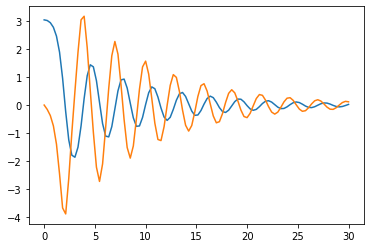

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

b = 0.25
c = 5

def equation(y, t):
  phi, omega = y
  deriv = [omega, 
           -b * omega - c * np.sin(phi)]
  return deriv

y0 = [np.pi - 0.1,
      0]

t = np.linspace(0, 30, num=100, endpoint=True)

solution = odeint(equation, y0, t)

phis = solution[:, 0]
omegas = solution[:, 1]

fig = plt.figure()
plt.plot(t, phis, t, omegas)
plt.show()

## Задание для самостоятельной работы

Распространение инфекции в группе людей описывается [системой дифференциальных уравнений](http://books.ifmo.ru/file/pdf/2383.pdf), так же описана [здесь](https://nplus1.ru/material/2019/12/26/epidemic-math):

$$
\frac {dS} {dt} = - \beta \cdot I(t) \cdot S(t) \\
\frac {dI} {dt} = \beta \cdot I(t) \cdot S(t) - \gamma \cdot I(t) \\
\frac {dR} {dt} = \gamma \cdot I(t) \\
S(0) = S_0 \\
I(0) = I_0 \\
R(0) = R_0
$$

где $S(t)$ - количество еще не заболевших в момент времени $t$, $I(t)$ - число больных в момент времени $t$, $R(t)$ - число выздоровевших в момент времени $t$, $\beta$ - интенсивность контактов с последующим заражением (то есть, сколько человек каждый инфицированный заразит за единицу времени), $\gamma$ - скорость выздоровления (то есть, сколько человек выздоравливает за единицу времени).

Вам необходимо:

1. На основе открытых источников примерно выбрать значения параметров $\beta$ и $\gamma$
2. Описать систему дифференциальных уравнений и решить ее на интервале 100 дней с точностью до одного дня, приняв количество заболевших в начальный момент времени равным 10, количество еще не заболевших - 1000000
3. Построить графики количества здоровых, инфицированных и переболевших на интервале 100 дней
4. Вычислить общее количество переболевших за период 100 дней (для этого необходимо использовать информацию и методы из предыдущей работы)


In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

beta = 
gamma = 